<a href="https://colab.research.google.com/github/hui509/titanic_analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BD%9C01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專題實作 #01 鐵達尼號存活預測

# 載入Titanic資料集的 `train.csv` 資料集
（資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv）


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)
df

# 定義 Titanic 資料中各個欄位

In [ ]:
col = {'en':['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
    'ch':['乘客ID','生存狀態','艙等','姓名','性別','年紀','兄弟姐妹/配偶的数量','父母/子女的数量','船票號碼','船票價格','艙位號碼','登船港口'],
    'note':['','0 = No, 1 = Yes','1 = 1st, 2 = 2nd, 3 = 3rd','','','','','','','','','C = Cherbourg, Q = Queenstown, S = Southampton']   }
content = pd.DataFrame(col)
content

# 說明「數值欄位/類別欄位」與「是否生存欄位」的關係程度

1. 整理數據，並轉換成可用的型態


In [ ]:
# 處理缺失值、刪除非數值資料
titanic = df.copy()
titanic.dropna(inplace=True)
titanic.drop(columns=['Name','Ticket','Cabin'],axis=1,inplace=True)

# 轉換Sex、Embarked欄位
titanic_onehotencoded = pd.get_dummies(titanic,columns=['Sex','Embarked'],dtype=int)
titanic_onehotencoded


2. 使用 Pearson 係數計算相關性

In [ ]:
correlation_matrix = titanic_onehotencoded.corr()
correlation_matrix


3. 使用seaborn和matplotlib，視覺化呈現相關性

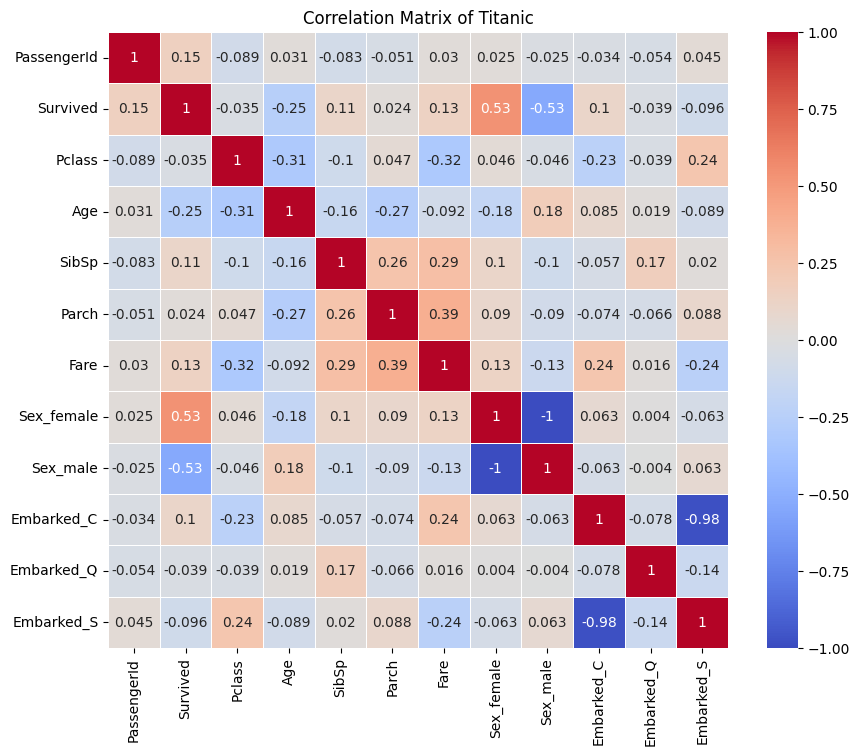

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,linewidth=0.5,cmap='coolwarm')
plt.title('Correlation Matrix of Titanic')
plt.show()


## 結論：
## 1. 在相關係數中，數值結果越接近正負1時，其相關性越大。
## 2. 此案例「性別Sex」和「年紀Age」兩欄位與生存欄位關係較大。